In [1]:
import sys
sys.path.append("../")
from triple_barrier.plots import PlotTripleBarrier
from triple_barrier.triple_barrier import TradeSide

import pandas as pd
import mplfinance as mpl

## Open Dataset

In [2]:
columns = ["date-time", "open", "high", "low", "close", "volume"]
df = pd.read_csv("../tests/data/EURUSD_5 Mins_Ask_2023.01.02_2024.02.02.csv", 
                 names=columns, 
                 parse_dates=True, 
                 index_col="date-time",
                 header=0)

## Calculate Features

In [3]:
df["mva-7"] = df["close"].rolling(7).mean()
df["mva-24"] = df["close"].rolling(24).mean()

In [4]:
FROM = 500
PERIODS = 50
TO = FROM + PERIODS
PIP_POSITION = 4
PIP_FACTOR = 10**-PIP_POSITION

## Plot Data

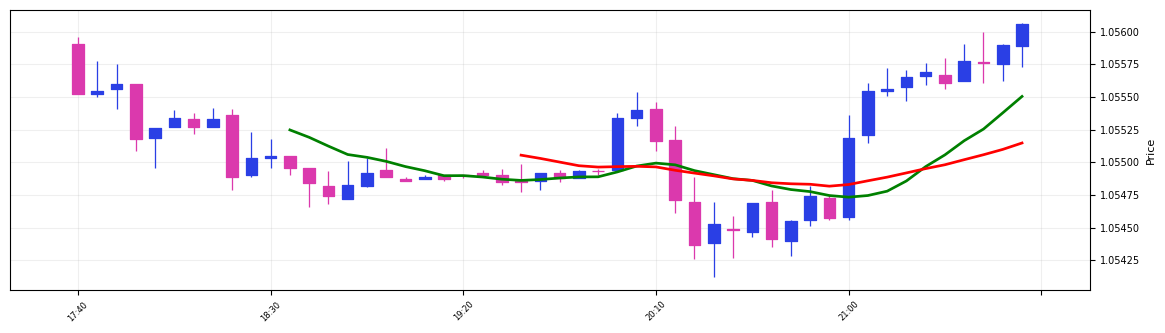

In [5]:
mpl.plot(df[FROM:TO], type="candle", figsize=(15,4), mav=(12,24), style="ibd")

### Short Cases

In [6]:
plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           4)

open_period = "2023-01-03 20:30:00"
time_barrier = "2023-01-03 22:45:00"
open_price = df.open[open_period]
trade_side = TradeSide.SELL

stop_loss_width = 5
take_profit_width = 20

stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)

Plotting barrier for 51


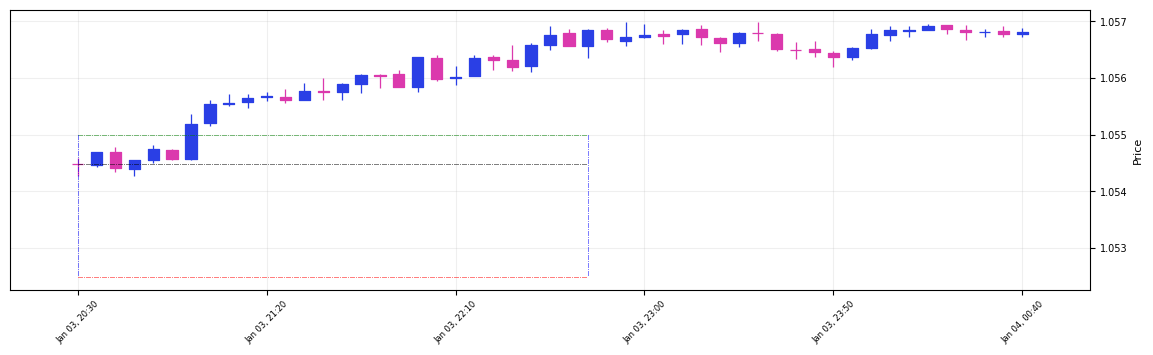

Open time  2023-01-03 20:30:00
Open price  1.05449
Stop loss 1.05499 (5) pips
Take profit 1.05249 (20) pips


In [7]:
plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Long Cases

In [8]:
plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           4)


open_period = "2023-01-02 22:30:00"
time_barrier = "2023-01-03 01:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.BUY

stop_loss_width = 10
take_profit_width = 15

stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)

Plotting barrier for 51


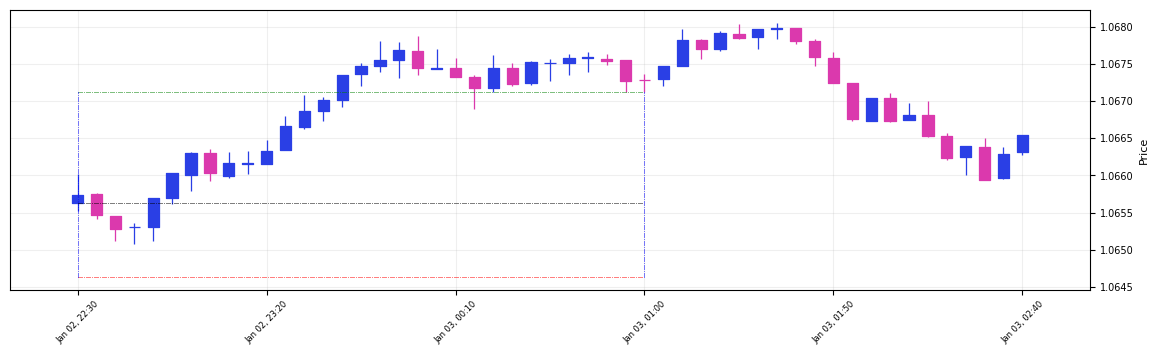

Open time  2023-01-02 22:30:00
Open price  1.06563
Stop loss 1.06463 (10) pips
Take profit 1.06713 (15) pips


In [9]:
plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             periods_to_plot=50
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Plot with moving averages

In [10]:
plot_tb = PlotTripleBarrier(df.open, 
                           df.high,
                           df.low,
                           df.close,
                           4,
                           overlay_features=[ df["mva-7"], 
                                             df["mva-24"]])


open_period = "2023-01-02 22:30:00"
time_barrier = "2023-01-03 01:00:00"
open_price = df.open[open_period]
trade_side = TradeSide.BUY

stop_loss_width = 10
take_profit_width = 15

stop_loss = round(open_price - trade_side.value * stop_loss_width*PIP_FACTOR, PIP_POSITION + 1)
take_profit = round(open_price + trade_side.value * take_profit_width*PIP_FACTOR, PIP_POSITION + 1)

Plotting barrier for 51


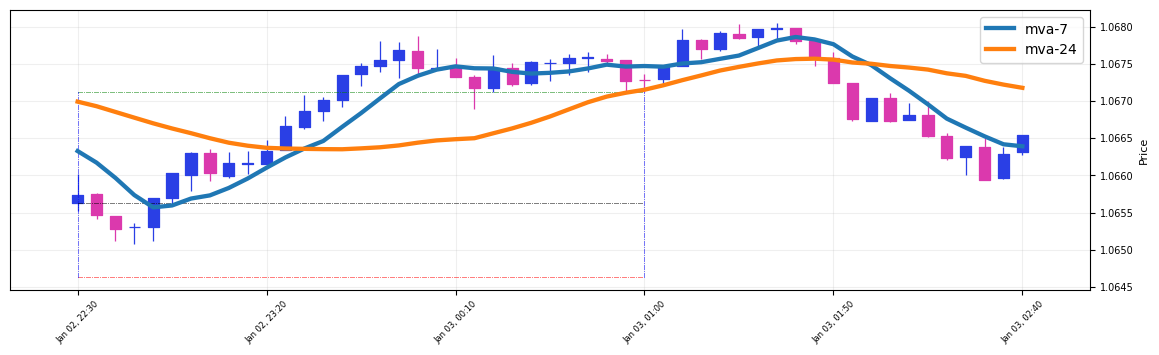

Open time  2023-01-02 22:30:00
Open price  1.06563
Stop loss 1.06463 (10) pips
Take profit 1.06713 (15) pips


In [11]:
plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             periods_to_plot=50
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")

### Plot dynamoc barrier between stop loss and take profit

In [12]:
mask = (df["close"].shift(1) < df["mva-24"].shift(1) ) & ( df["close"] > df["mva-24"] )
dynamic_close = df.loc[mask][open_period: ].head(1)["mva-24"].values[0].round(PIP_POSITION+1)

Plotting barrier for 51


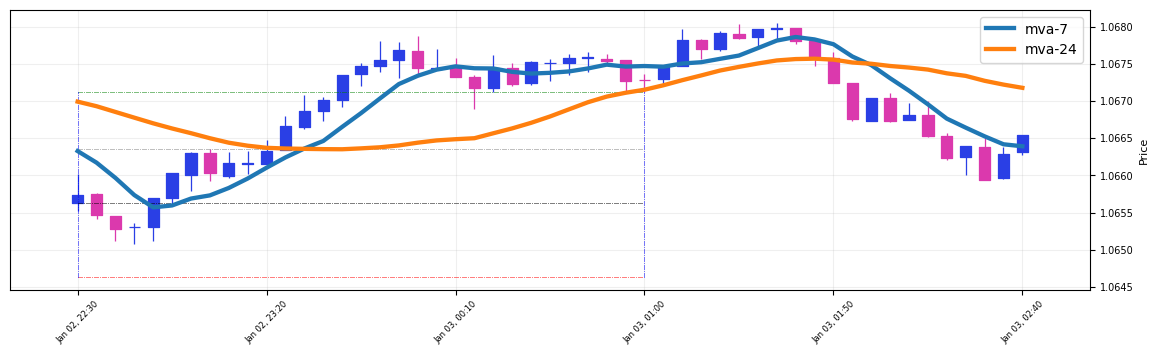

Open time  2023-01-02 22:30:00
Open price  1.06563
Stop loss 1.06463 (10) pips
Take profit 1.06713 (15) pips


In [13]:
plot_tb.plot(entry_period=open_period,
             stop_loss_level=stop_loss,
             take_profit_level=take_profit,
             time_barrier_datetime=time_barrier,
             dynamic_exit_price=dynamic_close,
             periods_to_plot=50
             )

print("Open time ", open_period)
print("Open price ", open_price)
print(f"Stop loss {stop_loss} ({stop_loss_width}) pips")
print(f"Take profit {take_profit} ({take_profit_width}) pips")